## Implementing Locally Linear Embedding (25 P)

In this programming homework we will implement locally linear embedding (LLE) and experiment with it on the swiss roll dataset. In particular, the effects of neighbourhood size and noise on the quality of the embedding will be analyzed.

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import sklearn,sklearn.datasets

The following code plots the swiss roll dataset (a commonly used dataset to test LLE) with `N=1000` data points and a noise parameter of `0.25`.

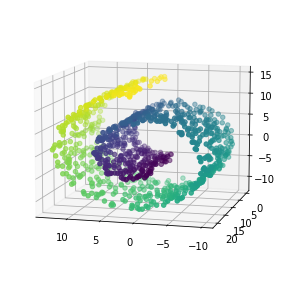

In [2]:
X, T = sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.25)
plt.figure(figsize=(5, 5))
ax = plt.gca(projection='3d')
ax.view_init(elev=10., azim=105)
ax.scatter(X[:,0],X[:,1],X[:,2],c=T)
plt.show()

Although the dataset is in three dimensions, the points follow a two-dimensional low-dimensional structure. The goal of embedding algorithms is to extract this underlying structure, in this case, unrolling the swiss roll into a two-dimensional Euclidean space.

In the following, we consider a simple implementation of LLE. You are required to complete the code by writing the portion where the optimal reconstruction weights are extracted. *(Hint: During computation, you need to solve an equation of the type Cw=**1**, where **1** is a column vector (1,1,...,1). In case k>d i.e. the size of the neighbourhood is larger than the number of dimensions of the input space, it is necessary to regularize the matrix C. You can do this by adding positive terms on the diagonal. A good starting point is 0.05.)*

In [3]:
def LLE(X, k):
    N = len(X)
    W = np.zeros([N,N])
    
    for i in range(N):
        diff_matrix = X[i] - X
        distances = np.sum(((diff_matrix)**2), axis=1)**0.5
        ind = distances < np.partition(distances, k+1)[k+1]
        ind[i] = False # ignoring distance to itself
        
        diffs_of_k_nearest = diff_matrix[ind]
        C = diffs_of_k_nearest @ diffs_of_k_nearest.T
        
        w_not_normalized = np.linalg.inv(C + 0.05 * np.eye(k)) @ np.ones(k)
        w = w_not_normalized / np.sum(w_not_normalized)
        W[i, ind] = w
    
    M = np.identity(N) - W - W.T + np.dot(W.T, W)
    E = np.linalg.svd(M)[0][:, -3:-1]
    
    return E

You can now test your implementation on the swiss roll dataset and vary the noise in the data and the parameter `k` of the LLE algorithm. Results are shown below:

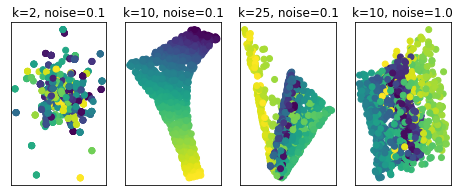

In [5]:
f = plt.figure(figsize=(12,3))
for t,(k,noise) in enumerate([(2,0.1),(10,0.1),(25,0.1),(10,1)]):
    X,T = sklearn.datasets.make_swiss_roll(n_samples=1000, noise=noise)
    embedding = LLE(X,k=k)
    ax = f.add_subplot(1,6,t+1)
    ax.set_title('k=%d, noise=%.1f'%(k,noise))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.scatter(embedding[:,0],embedding[:,1],c=T)

It can be observed that the parameter `k` must be carefully tuned to have sufficiently many neighbors for stability but also not too many. We can further observe that LLE works well as long as the noise in the data remains low enough.